# Machine Learning Engineer Nanodegree
Jon Wayland <br>
3/29/2017

## Capstone Project - Predicting Student Alcohol Consumption: Students who are "at-risk"
This is the working environment for the capstone project of predicting which students who will be at-risk for alcohol consumption based on the results of a survey for math and Portuguese students. The supporting datasets and existing analyses for comparisons and insights can be found on kaggle at https://www.kaggle.com/uciml/student-alcohol-consumption

## Step One - Bringing the data in, loading necessary libraries and merging the data
All of the data is found on kaggle. According to a few analyses, the "paid" variable should not be used for merging as it is specific to the class and not the student. Thus all other variables will be used for merging to assess how many individuals are in both data sets. According to the below analysis, there should be 85 individuals in both datasets and so a full outer join will be used to get unique results.
See: https://www.kaggle.com/calcifer/d/uciml/student-alcohol-consumption/alcohol-consumption-and-average-grades

In [1]:
#######################################
### Loading the necessary libraries ###
#######################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from time import time
from IPython.display import display # Allows the use of display() for DataFrame

%matplotlib inline

print('All libraries loaded successfully')

###########################
### Importing the data ####
###########################

math = pd.read_csv("student-mat.csv")
port = pd.read_csv("student-por.csv")
print('Data has loaded successfully')
print "---------------------------------------------------------------"


print "*There are",math.shape[0],"rows in the math dataset"
print "*There are",port.shape[0],"rows in the Portuguese dataset"
print "---------------------------------------------------------------"

########################
### Merging the data ###
########################

# Note - There are 382 students that belong to both datasets so must do a full outer join to get unique records only

# Checking the students in both data sets
inner_join = math.merge(port, 
                        on =["school","sex","age","address","famsize",
                             "Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                             "guardian","traveltime", "studytime","failures",
                             "schoolsup", "famsup", "activities", "nursery", 
                             "higher", "internet", "romantic", "famrel", "freetime",
                             "goout", "Dalc", "Walc", "health", "absences"],
                        how = 'inner')
# Combining the data in a full outer join to get all unique students
data = math.merge(port, 
                        on =["school","sex","age","address","famsize",
                             "Pstatus","Medu","Fedu","Mjob","Fjob","reason",
                             "guardian","traveltime", "studytime","failures",
                             "schoolsup", "famsup", "activities", "nursery", 
                             "higher", "internet", "romantic", "famrel", "freetime",
                             "goout", "Dalc", "Walc", "health", "absences"],
                        how = 'outer')

print "Expecting 85 students in both datasets. Found",inner_join.shape[0],"students in both datasets."
print "Expecting 959 unique students. Found",data.shape[0],"unique students."

#display(data.head())

########################
### Removing Objects ###
########################

# Removing the inner join:
del(inner_join)

# Removing variables that will not be used:
data = data.drop('paid_x', 1)
data = data.drop('paid_y', 1)
data = data.drop('G1_x', 1)
data = data.drop('G1_y', 1)
data = data.drop('G2_x', 1)
data = data.drop('G2_y', 1)
data = data.drop('G3_x', 1)
data = data.drop('G3_y', 1)

#####################
### Final Display ###
#####################

display(data.head())
print data.columns

All libraries loaded successfully
Data has loaded successfully
---------------------------------------------------------------
*There are 395 rows in the math dataset
*There are 649 rows in the Portuguese dataset
---------------------------------------------------------------
Expecting 85 students in both datasets. Found 85 students in both datasets.
Expecting 959 unique students. Found 959 unique students.


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


Index([u'school', u'sex', u'age', u'address', u'famsize', u'Pstatus', u'Medu',
       u'Fedu', u'Mjob', u'Fjob', u'reason', u'guardian', u'traveltime',
       u'studytime', u'failures', u'schoolsup', u'famsup', u'activities',
       u'nursery', u'higher', u'internet', u'romantic', u'famrel', u'freetime',
       u'goout', u'Dalc', u'Walc', u'health', u'absences'],
      dtype='object')


## Step 2 - Structuring and pre-processing the data
A lot of the variables are not represented as a measurable format and thus I must structure the data accordingly. Also, my dependent variable, alcohol consumption, will be represented as a weighted average between week day consumption and weekend consumption. This step will also do this transformation.


In [2]:
#print data.describe(),'... All other variables need structured. Purposely leaving above variables with current structure.'

############################
### Structuring the data ###
############################

# Variables needed structured:
'''
'school', 'sex', 'address', 'famsize', 'Pstatus', 
     'Mjob', 'Fjob', 'reason', 'guardian', 
        'schoolsup', 'famsup', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'absences'
'''

# Forcing yes = 1 and no = 0 for the following variables:
'''
schoolsup - extra educational support (binary: yes or no)
famsup - family educational support (binary: yes or no)
activities - extra-curricular activities (binary: yes or no)
nursery - attended nursery school (binary: yes or no)
higher - wants to take higher education (binary: yes or no)
internet - Internet access at home (binary: yes or no)
romantic - with a romantic relationship (binary: yes or no)
'''
data = data.replace('yes', 1.0)
data = data.replace('no', 0.0)

# One-Hot Encoding the rest of the variables
data = pd.get_dummies(data, dummy_na=False)
#print 'Current State', display(data.describe())

#####################################################
### Function for Weighted Avg Alcohol Consumption ###
#####################################################

def weighted_avg(Dalc,Walc):
    '''This function creates a weighted average score of alcohol consumption 
    based on week day consumption and weekend consumption.'''
    Dalc = Dalc*(5./7.) # 5 week days
    Walc = Walc*(2./7.) # 2 weekend days
    return (Dalc+Walc)/2. # Average of weighted scores

data['alcohol'] = weighted_avg(data['Dalc'],data['Walc'])


#############################################
### Function for Alcohol Consumption Risk ###
#############################################

def alc_risk(alcohol):
    '''This function flags an individual as a '1' if they are above the third quartile
    in the weighted alcohol consumption average and a 0 if they are below'''
    Q3 = np.percentile(alcohol, 75) # Third Quartile
    alcohol_risk = alcohol >= Q3
    return alcohol_risk+1.-1.

data['alcohol_risk'] = alc_risk(data['alcohol'])

##############################################################
### Splitting the data into the features and target labels ###
##############################################################
alcohol = data['alcohol']
alcohol_risk = data['alcohol_risk']
predictors = data[:] # copy of the dataset for our predictor dataset
predictors = predictors.drop('alcohol', axis = 1)
predictors = predictors.drop('alcohol_risk', axis = 1)
alc_vars = data.loc[:,['Dalc','Walc', 'alcohol', 'alcohol_risk']]
predictors = predictors.drop('Dalc', axis = 1)
predictors = predictors.drop('Walc', axis = 1)

## Step 3 - Data exploring
In this step, I will be exploring the data for relationships and distributions. 

The median value for Dalc is  1.0
The median value for Walc is  2.0
The total number of students at or above the 3rd quartile  245.0

             Dalc        Walc     alcohol  alcohol_risk
count  959.000000  959.000000  959.000000    959.000000
mean     1.513034    2.311783    0.870624      0.255474
std      0.936160    1.289826    0.472705      0.436355
min      1.000000    1.000000    0.500000      0.000000
25%      1.000000    1.000000    0.500000      0.000000
50%      1.000000    2.000000    0.642857      0.000000
75%      2.000000    3.000000    1.142857      1.000000
max      5.000000    5.000000    2.500000      1.000000
                  Dalc      Walc   alcohol  alcohol_risk
Dalc          1.000000  0.630725  0.953153      0.805707
Walc          0.630725  1.000000  0.835910      0.689215
alcohol       0.953153  0.835910  1.000000      0.838530
alcohol_risk  0.805707  0.689215  0.838530      1.000000


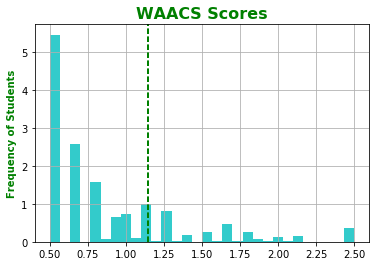

In [3]:
########################################
### Looking at the outcome variables ###
########################################

print 'The median value for Dalc is ',alc_vars.Dalc.median()
print 'The median value for Walc is ',alc_vars.Walc.median()
print 'The total number of students at or above the 3rd quartile ',alc_vars.alcohol_risk.sum()
print ""
print alc_vars.describe()

print alc_vars.corr()
plt.hist(alc_vars.alcohol, 
         30, 
         normed=1, 
         facecolor='c', 
         alpha=0.8)
plt.title("WAACS Scores", color = 'g', fontsize = 16, fontweight = 777)
plt.ylabel('Frequency of Students', color = 'g', fontweight = 777)
plt.grid(True)
plt.axvline(np.percentile(alc_vars.alcohol, 75), 
            color='g', 
            linestyle='dashed', 
            linewidth=2)


In [4]:
##########################################
### Looking at the predictor variables ###
##########################################
def predictors_summary(predictors):
    '''This is to print the stats for subsets of above and below 3rd quartile'''
    print 'There are', len(predictors), 'students in this dataset'
    print 'The average age of the students was %.2f' % predictors.age.mean()
    print 'There were', predictors.sex_M.sum(), '(%.2f' % float(predictors.sex_M.mean()*100.0),'%)' , 'male students and',predictors.sex_F.sum(), '(%.2f' % float(predictors.sex_F.mean()*100.0),'%)' , 'female students'
    print 'Median traveltime was', predictors.traveltime.median()
    print 'Median studytime was', predictors.studytime.median()
    print 'Median past failures was', predictors.failures.median()
    print 'There were', predictors.famsize_GT3.sum(), '(%.2f' % float(predictors.famsize_GT3.mean()*100.0),'%)', 'students who came from families greater than 3 people.'
    print 'There were', predictors.internet.sum(),  '(%.2f' % float(predictors.internet.mean()*100.0),'%)', 'students with internet access at home.'
    print 'The average going out value was %.2f' % predictors.goout.mean()
    print 'The average quality of family relationships value was %.2f' % predictors.famrel.mean()
    print 'The average current health status value was %.2f' % predictors.health.mean()
    print 'The average free time after school value was %.2f' % predictors.freetime.mean()
    print 'There were ', predictors.Pstatus_A.sum(),  '(%.2f' % float(predictors.Pstatus_A.mean()*100.0),'%)', 'students with parents who are separated.'
    print 'There were ', predictors.romantic.sum(),  '(%.2f' % float(predictors.romantic.mean()*100.0),'%)', 'students who are romantically involved.'
    print 'The average number of school absences was %.2f' % predictors.absences.mean()
    print 'The median number of school absences was', predictors.absences.median()
    print 'The total number of students who want a higher education was', predictors.higher.sum(), '(%.2f' % float(predictors.higher.mean()*100.0),'%)'
    print predictors.reason_home.sum(), '(%.2f' % float(predictors.reason_home.mean()*100.0),'%)', 'students who came to this school was because it was close to home'
    print predictors.reason_course.sum(), '(%.2f' % float(predictors.reason_course.mean()*100.0),'%)', 'students who came to this school was because of course preference'
    print predictors.reason_reputation.sum(), '(%.2f' % float(predictors.reason_reputation.mean()*100.0),'%)', 'students who came to this school was because of its reputation'
    print predictors.reason_other.sum(), '(%.2f' % float(predictors.reason_other.mean()*100.0),'%)', 'students who came to this school was for other reasons'
    print 'The median score for fathers schooling was %.2f' % predictors.Fedu.median()
    print 'The median score for mothers schooling was %.2f' % predictors.Medu.median()
    print 'There were ', predictors.schoolsup.sum(),  '(%.2f' % float(predictors.schoolsup.mean()*100.0),'%)', 'students with extra educational support.'
    print 'There were ', predictors.famsup.sum(),  '(%.2f' % float(predictors.famsup.mean()*100.0),'%)', 'students with family educational support.'
    print 'There were ', predictors.nursery.sum(),  '(%.2f' % float(predictors.nursery.mean()*100.0),'%)', 'students who attended nursery school.'
predictors_summary(predictors)

There are 959 students in this dataset
The average age of the students was 16.76
There were 418 (43.59 %) male students and 541 (56.41 %) female students
Median traveltime was 1.0
Median studytime was 2.0
Median past failures was 0.0
There were 677 (70.59 %) students who came from families greater than 3 people.
There were 755.0 (78.73 %) students with internet access at home.
The average going out value was 3.19
The average quality of family relationships value was 3.91
The average current health status value was 3.55
The average free time after school value was 3.20
There were  114 (11.89 %) students with parents who are separated.
There were  343.0 (35.77 %) students who are romantically involved.
The average number of school absences was 4.66
The median number of school absences was 2.0
The total number of students who want a higher education was 871.0 (90.82 %)
233 (24.30 %) students who came to this school was because it was close to home
398 (41.50 %) students who came to this s

In [5]:
##################################################
### Looking at Students Below the 3rd Quartile ###
##################################################
below_q3 = data.loc[(data.alcohol_risk == 0.0)]
predictors_summary(below_q3)

There are 714 students in this dataset
The average age of the students was 16.71
There were 260 (36.41 %) male students and 454 (63.59 %) female students
Median traveltime was 1.0
Median studytime was 2.0
Median past failures was 0.0
There were 517 (72.41 %) students who came from families greater than 3 people.
There were 553.0 (77.45 %) students with internet access at home.
The average going out value was 2.99
The average quality of family relationships value was 3.96
The average current health status value was 3.48
The average free time after school value was 3.10
There were  88 (12.32 %) students with parents who are separated.
There were  261.0 (36.55 %) students who are romantically involved.
The average number of school absences was 4.15
The median number of school absences was 2.0
The total number of students who want a higher education was 659.0 (92.30 %)
169 (23.67 %) students who came to this school was because it was close to home
303 (42.44 %) students who came to this sc

In [6]:
########################################################
### Looking at Students At or Above the 3rd Quartile ###
########################################################
above_q3 = data.loc[(data.alcohol_risk == 1.0)]
predictors_summary(above_q3)

There are 245 students in this dataset
The average age of the students was 16.90
There were 158 (64.49 %) male students and 87 (35.51 %) female students
Median traveltime was 1.0
Median studytime was 2.0
Median past failures was 0.0
There were 160 (65.31 %) students who came from families greater than 3 people.
There were 202.0 (82.45 %) students with internet access at home.
The average going out value was 3.76
The average quality of family relationships value was 3.79
The average current health status value was 3.73
The average free time after school value was 3.50
There were  26 (10.61 %) students with parents who are separated.
There were  82.0 (33.47 %) students who are romantically involved.
The average number of school absences was 6.16
The median number of school absences was 4.0
The total number of students who want a higher education was 212.0 (86.53 %)
64 (26.12 %) students who came to this school was because it was close to home
95 (38.78 %) students who came to this school

## Step 4 - Splitting the data into training and testing sets 
Each of the three datasets need split into the training and testing datasets for our benchmark and improved models. The sets that will be split will be alcohol/predictors for the regression benchmark and then alcohol_risk/predictors for the logistic regression benchmark and the improved model.


In [8]:
############################################
### Splitting the datasets appropriately ###
############################################

# Import necessary library
from sklearn.cross_validation import train_test_split

# For the regression models
reg_X_train, reg_X_test, reg_y_train, reg_y_test = train_test_split(predictors, alcohol, test_size = 0.2, random_state = 77)

# For the classification models
clf_X_train, clf_X_test, clf_y_train, clf_y_test = train_test_split(predictors, alcohol_risk, test_size = 0.2, random_state = 77)


print 'Splitting datasets succesful'
print '-------------------------------------------------------------------------'
print "Regression benchmark/improved models' training set has {} samples.".format(reg_X_train.shape[0])
print "Regression benchmark/improved models' testing set has {} samples.".format(reg_X_test.shape[0])
print '-------------------------------------------------------------------------'
print "Classification benchmark/improved models' training set has {} samples.".format(clf_X_train.shape[0])
print "Classification benchmark/improved models' testing set has {} samples.".format(clf_X_test.shape[0])

Splitting datasets succesful
-------------------------------------------------------------------------
Regression benchmark/improved models' training set has 767 samples.
Regression benchmark/improved models' testing set has 192 samples.
-------------------------------------------------------------------------
Classification benchmark/improved models' training set has 767 samples.
Classification benchmark/improved models' testing set has 192 samples.


## Step 5 - Training and testing benchmark models
This step will be training and testing our simple benchmark models and evaluating the R-Squared measure for the linear regresion and the accuracy for the classification model. For purposes of the benchmark models, I am keeping all predictor variables while training.

In [9]:
########################################################
### Importing the libraries for each benchmark model ###
########################################################
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [10]:
#######################################
### Creating the regression objects ###
#######################################

regr = linear_model.LinearRegression()
lregr = linear_model.LogisticRegression()

#####################################
### Fitting the regression models ###
#####################################

Breg = regr.fit(reg_X_train, reg_y_train)
Bclf = lregr.fit(clf_X_train, clf_y_train)

In [15]:
###############################################
### Creating an Adjusted R-Squared Function ###
###############################################

from sklearn.metrics import r2_score

def Adj_R2(alg, X, y, type):
    alg = alg.fit(X,y)
    R2 = r2_score(y, alg.predict(X)) # R-Squared
    N = float(int(len(y))) # Size of training dataset
    p = float(int(len(X.columns))) # Number of predictors
    Adj_R2 = 1-((1.-R2)*(N-1))/(N-p-1)
    if type == 1:
        return R2
    elif type == 2:
        return Adj_R2
    else: 
        return 'Enter a valid type: 1 - R-Squared and 2 - Adjusted R-Squared'

### Checking differences in scores ###    
print 'R2 1:', Breg.score(reg_X_test, reg_y_test)
print 'R2 2:', r2_score(reg_y_test, Breg.predict(reg_X_test))
print 'R2 3:', Adj_R2(Breg, reg_X_test, reg_y_test, type = 1)
print 'Adj R2:', Adj_R2(Breg, reg_X_test, reg_y_test, type = 2)


R2 1: 0.504629275183
R2 2: 0.504629275183
R2 3: 0.504629275183
Adj R2: 0.351946517534


In [22]:
#######################################################
### Looking at model components on Testing Datasets ###
#######################################################

#*** Regression Metrics ***#

B_MSE = np.mean((Breg.predict(reg_X_test) - reg_y_test) ** 2)

# R-Squared
B_R2 = Adj_R2(Breg, reg_X_test, reg_y_test, type = 1)

# Adjusted R-Squared
B_Adj_R2 = Adj_R2(Breg, reg_X_test, reg_y_test, type = 2)

#*** Classification Metrics ***#
B_acc = accuracy_score(clf_y_test, Bclf.predict(clf_X_test))

# precision is # of true positives divided by the total number of true positives plus false positives
B_precision = precision_score(clf_y_test, Bclf.predict(clf_X_test))
# recall = # of true positives divided by the total number of true positives plus false negatives
B_recall = recall_score(clf_y_test, Bclf.predict(clf_X_test))
# F1 Score takes into account BOTH precision and recall
B_F1_score = f1_score(clf_y_test, Bclf.predict(clf_X_test))

    
                                                         ##############
############################################################ Output ############################################################
                                                         ##############

print "******************************************* Regression Benchmark *******************************************"
print "The following measures are for the regression benchmark. The key measure here is the **Ajusted R-Squared."
print("Mean-squared error for regression benchmark: %.2f" % B_MSE)
print('R-Squared for regression benchmark: %.2f' % B_R2)

print('**Adjusted R-Squared for regression benchmark: %.2f' % B_Adj_R2)

print ""
print "***************************************** Classification Benchmark *****************************************"
print "The following measures are for the classifier benchmark." 
print "The key measures here are the **F1 Score, **precision and **recall."
print ("Accuracy score for classifier benchmark: %.2f" % B_acc)
print ("**Recall score for classifier benchmark: %.2f" % B_recall)
print ("**Precision score for classifier benchmark: %.2f" % B_precision)
print ("**F1 score for benchmark 2: %.2f" % B_F1_score)

******************************************* Regression Benchmark *******************************************
The following measures are for the regression benchmark. The key measure here is the **Ajusted R-Squared.
Mean-squared error for regression benchmark: 0.14
R-Squared for regression benchmark: 0.50
**Adjusted R-Squared for regression benchmark: 0.35

***************************************** Classification Benchmark *****************************************
The following measures are for the classifier benchmark.
The key measures here are the **F1 Score, **precision and **recall.
Accuracy score for classifier benchmark: 0.76
**Recall score for classifier benchmark: 0.36
**Precision score for classifier benchmark: 0.65
**F1 score for benchmark 2: 0.47


In [20]:
#################################################
### Looking at the coefficients of each model ###
#################################################
import math 
print""
# The names of predictor columns
p_cols = np.array(predictors.columns)
# Getting the coefficients for each model
Breg_coef = np.array(Breg.coef_)
Bclf_coef = np.array(Bclf.coef_)
'''
print""
print 'There are ',len(p_cols),'coefficients for regression benchmark 1 to examine...'

i = 0
while i < 45:
    print p_cols[i],":",Breg_coef[i]
    i = i+1

print""
print 'There are ',len(p_cols),'coefficients for classification benchmark to examine...'    
i = 0
while i < 45:
    print p_cols[i],":",math.exp(Bclf_coef[0][i]) #Must take the exp() of the coefficients for interpretability
    i = i+1  
'''

'\nprint""\nprint \'There are \',len(p_cols),\'coefficients for regression benchmark 1 to examine...\'\n\ni = 0\nwhile i < 45:\n    print p_cols[i],":",Breg_coef[i]\n    i = i+1\n\nprint""\nprint \'There are \',len(p_cols),\'coefficients for classification benchmark to examine...\'    \ni = 0\nwhile i < 45:\n    print p_cols[i],":",math.exp(Bclf_coef[0][i]) #Must take the exp() of the coefficients for interpretability\n    i = i+1  \n'

## Step 6 - Part 1 - Implementing Improvements on Each Model
In this step, I will be experimenting with random forest and gradient boosting machines for both models for an attempt to make improvements.

In [33]:
##################################
### Libraries for Improvements ###
##################################

from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
rcParams['figure.figsize'] = 12, 4

In [24]:
# Functions inspired by:
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


####################################
### Classification Model Fitting ###
####################################

def clf_modelfit(alg, X, y, predictors, X_test, y_test,
                 performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
    #Predict testing set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = alg.predict_proba(X_test)[:,1] 
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "**Training Metrics**"
    print "Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions)
    print "**Precision : %.4g" % metrics.precision_score(y.values, dtrain_predictions)
    print "**Recall : %.4g" % metrics.recall_score(y.values, dtrain_predictions)
    print "**F1 Score : %.4g" % metrics.f1_score(y.values, dtrain_predictions)
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    print ""        
    print "**Testing Metrics**"
    print "Accuracy : %.4g" % metrics.accuracy_score(y_test.values, dtest_predictions), " (Benchmark: %.4g)" % B_acc
    print "**Precision : %.4g" % metrics.precision_score(y_test.values, dtest_predictions), " (Benchmark: %.4g)" % B_precision
    print "**Recall : %.4g" % metrics.recall_score(y_test.values, dtest_predictions), " (Benchmark: %.4g)" % B_recall
    print "**F1 Score : %.4g" % metrics.f1_score(y_test.values, dtest_predictions), " (Benchmark: %.4g)" % B_F1_score
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances', color = 'c')
        plt.ylabel('Feature Importance Score', color = 'g')
        plt.title('Feature Importances for Classification', color = 'g', fontsize = 16, fontweight = 777)


################################
### Regression Model Fitting ###
################################
        
def reg_modelfit(alg, X, y, predictors, X_test, y_test,
                 performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
        
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds)
    
    MSE_train = np.mean((alg.predict(X) - y) ** 2)
    R2_train = Adj_R2(alg, X, y, type = 1)
    Adj_R2_train = Adj_R2(alg, X, y, type = 2)
    
    MSE_test = np.mean((alg.predict(X_test) - y_test) ** 2)
    R2_test = Adj_R2(alg, X_test, y_test, type = 1)
    Adj_R2_test = Adj_R2(alg, X_test, y_test, type = 2)
    
    #Print model report:
    print "**Training Metrics**"
    print "Mean Square Error : %.4g " % MSE_train
    print "R Squared : %.4g" % R2_train
    print "**Adjusted R Squared : %.4g" % Adj_R2_train 
    #if performCV:
    print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    print ""        
    print "**Testing Metrics**"
    print "Mean Square Error : %.4g" % MSE_test, " (Benchmark: %.4g)" % B_MSE 
    print "R Squared : %.4g" % R2_test, " (Benchmark: %.4g)" % B_R2
    print "**Adjusted R Squared : %.4g" % Adj_R2_test, " (Benchmark: %.4g)" % B_Adj_R2
    
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances', color = 'c')
        plt.ylabel('Feature Importance Score', color = 'g')
        plt.title('Feature Importances for Regression', color = 'g', fontsize = 16, fontweight = 777)

*************************************************** PRE-TUNED MODEL ***************************************************
**Training Metrics**
Accuracy : 0.914
**Precision : 0.9429
**Recall : 0.6947
**F1 Score : 0.8
CV Score : Mean - 0.8103685 | Std - 0.01048608 | Min - 0.7990018 | Max - 0.826087

**Testing Metrics**
Accuracy : 0.7969  (Benchmark: 0.7604)
**Precision : 0.7222  (Benchmark: 0.6452)
**Recall : 0.4727  (Benchmark: 0.3636)
**F1 Score : 0.5714  (Benchmark: 0.4651)


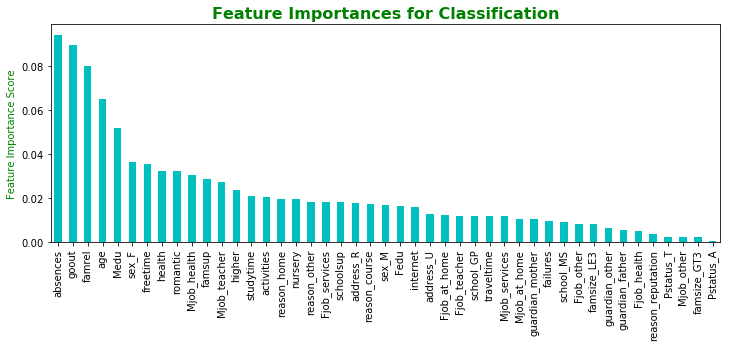

In [25]:
############################################
### Assigning Classifiers and Regressors ###
############################################

gbm_clf = GradientBoostingClassifier(random_state=17)
rf_clf = RandomForestClassifier(random_state=17)
gbm_reg = GradientBoostingRegressor(random_state=17)
rf_reg = RandomForestRegressor(random_state=17)

###################################################
### Baseline Improvement Models (Before Tuning) ###
###################################################
print('*************************************************** PRE-TUNED MODEL ***************************************************')
clf_modelfit(gbm_clf, clf_X_train, clf_y_train, p_cols, clf_X_test, clf_y_test)
#clf_modelfit(rf_clf, clf_X_train, clf_y_train, p_cols, clf_X_test, clf_y_test)
#reg_modelfit(gbm_reg, reg_X_train, reg_y_train, p_cols, reg_X_test, reg_y_test)
#reg_modelfit(rf_reg, reg_X_train, reg_y_train, p_cols, reg_X_test, reg_y_test)

## Step 6 - Part 2 - Tuning
In this step, I will tuning the parameters using grid search for each problem type.

*************************************************** TUNED MODEL ***************************************************
**Training Metrics**
Accuracy : 1
**Precision : 1
**Recall : 1
**F1 Score : 1
CV Score : Mean - 0.8672067 | Std - 0.01355755 | Min - 0.8414188 | Max - 0.8811252

**Testing Metrics**
Accuracy : 0.8802  (Benchmark: 0.7604)
**Precision : 0.8478  (Benchmark: 0.6452)
**Recall : 0.7091  (Benchmark: 0.3636)
**F1 Score : 0.7723  (Benchmark: 0.4651)


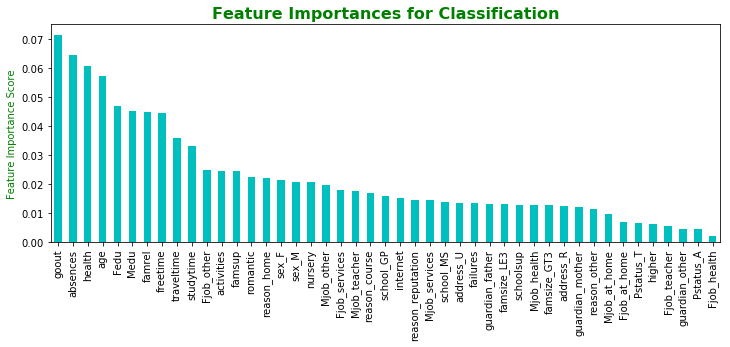

In [26]:
##########################################################
### Tuning Parameters for Gradient Boosting Classifier ###
##########################################################
                #######################
                # Scoring on F1 Score #
                #######################        

gbm_clf = GradientBoostingClassifier(random_state=17, 
                                    n_estimators=280,
                                    min_samples_split = 2,
                                    min_samples_leaf = 3,
                                    max_depth = 6,
                                    max_features = 12,
                                    subsample = 0.8,
                                    learning_rate = 0.1
                                    )

########################
### Parameter Trials ###
########################
#param_test = {'n_estimators':range(20,551,10)} #280
#param_test = {'max_depth':range(2,15,1), 'min_samples_split':range(2,15,1)} #6 , 2
#param_test = {'max_features':range(2,15,1)} #12
#param_test = {'min_samples_leaf':range(2,10,1)} #3
#param_test = {'subsample':[0.6,0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]} #0.8

#gbm_clf_gs = GridSearchCV(estimator = gbm_clf, param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)

#gbm_clf_gs.fit(clf_X_train, clf_y_train)
#gbm_clf_gs.grid_scores_, gbm_clf_gs.best_params_, gbm_clf_gs.best_score_

###############################
### Testing the Tuned Model ###
###############################
print('*************************************************** TUNED MODEL ***************************************************')
clf_modelfit(gbm_clf, clf_X_train, clf_y_train, p_cols, clf_X_test, clf_y_test)

*************************************************** TUNED MODEL ***************************************************
**Training Metrics**
Accuracy : 0.9674
**Precision : 1
**Recall : 0.8684
**F1 Score : 0.9296
CV Score : Mean - 0.8433567 | Std - 0.0115538 | Min - 0.8315789 | Max - 0.8629291

**Testing Metrics**
Accuracy : 0.7917  (Benchmark: 0.7604)
**Precision : 0.6923  (Benchmark: 0.6452)
**Recall : 0.4909  (Benchmark: 0.3636)
**F1 Score : 0.5745  (Benchmark: 0.4651)


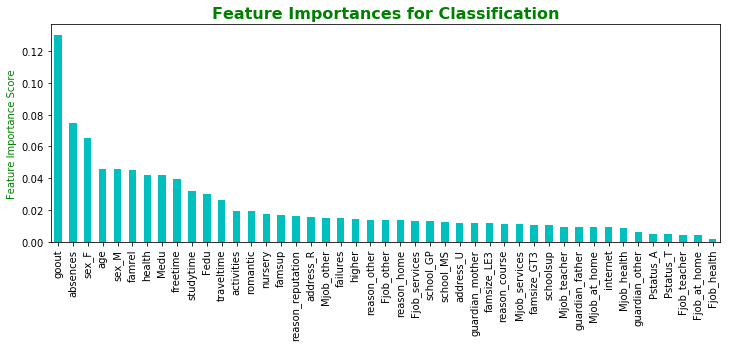

In [27]:
######################################################
### Tuning Parameters for Random Forest Classifier ###
######################################################
                #######################
                # Scoring on F1 Score #
                #######################        
            
rf_clf = RandomForestClassifier(random_state=17, 
                                n_estimators=80,
                                max_features = 11,
                                max_depth = 12,
                                min_samples_split = 5,
                                min_samples_leaf = 2,
                                n_jobs = 1,
                                oob_score = True
                               )

########################
### Parameter Trials ###
########################

#param_test = {'n_estimators':range(10,551,10)} #80
#param_test = {'max_depth':range(2,15,1), 'min_samples_split':range(2,15,1)} #12 , 5
#param_test = {'max_features':range(2,15,1)} #11
#param_test = {'min_samples_leaf':range(2,15,1)} # 2
#param_test = {'n_jobs':range(1,5,1)} 

#rf_clf_gs = GridSearchCV(estimator = rf_clf, param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
#rf_clf_gs.fit(clf_X_train, clf_y_train)
#rf_clf_gs.grid_scores_, rf_clf_gs.best_params_, rf_clf_gs.best_score_
###############################
### Testing the Tuned Model ###
###############################
print('*************************************************** TUNED MODEL ***************************************************')
clf_modelfit(rf_clf, clf_X_train, clf_y_train, p_cols, clf_X_test, clf_y_test)

*************************************************** TUNED MODEL ***************************************************
**Training Metrics**
Mean Square Error : 0.06642 
R Squared : 0.6817
**Adjusted R Squared : 0.6618
CV Score : Mean - 0.3122315 | Std - 0.07487997 | Min - 0.1882947 | Max - 0.3913413

**Testing Metrics**
Mean Square Error : 0.1479  (Benchmark: 0.1377)
R Squared : 0.9202  (Benchmark: 0.5046)
**Adjusted R Squared : 0.8956  (Benchmark: 0.3519)


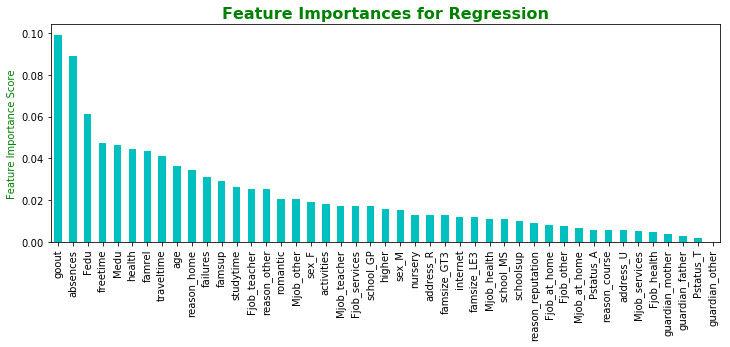

In [28]:
#########################################################
### Tuning Parameters for Gradient Boosting Regressor ###
#########################################################
            #################################
                # Scoring on R Squared #
            #################################
            # Note: Using R-Squared will be fine to tune the model as the number of predictors is not changing 
            #       Thus adjusted R-Squared is not necessary

gbm_reg = GradientBoostingRegressor(random_state=17, 
                                    n_estimators=120,
                                    max_depth = 5,
                                    min_samples_split = 14,
                                    min_samples_leaf = 3,
                                    subsample  = 0.8,
                                    max_features = 13,
                                    max_leaf_nodes = 7,
                                    learning_rate = 0.1
                                   )

########################
### Parameter Trials ###
########################

#param_test = {'n_estimators':range(20,551,10)} #120
#param_test = {'max_depth':range(2,21,1), 'min_samples_split':range(2,21,1)} # 5, 14
#param_test = {'max_features':range(2,15,1)} # 13
#param_test = {'min_samples_leaf':range(2,10,1)} # 3
#param_test = {'subsample':[0.6,0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]} # 0.8

#gbm_reg_gs = GridSearchCV(estimator = gbm_reg, param_grid = param_test, scoring= 'r2',n_jobs=4,iid=False, cv=5)

#gbm_reg_gs.fit(reg_X_train, reg_y_train)
#gbm_reg_gs.grid_scores_, gbm_reg_gs.best_params_, gbm_reg_gs.best_score_

###############################
### Testing the Tuned Model ###
###############################
print('*************************************************** TUNED MODEL ***************************************************')
reg_modelfit(gbm_reg, reg_X_train, reg_y_train, p_cols, reg_X_test, reg_y_test)

*************************************************** TUNED MODEL ***************************************************
**Training Metrics**
Mean Square Error : 0.03675 
R Squared : 0.8239
**Adjusted R Squared : 0.8129
CV Score : Mean - 0.3433714 | Std - 0.04584345 | Min - 0.2625783 | Max - 0.3888814

**Testing Metrics**
Mean Square Error : 0.1472  (Benchmark: 0.1377)
R Squared : 0.81  (Benchmark: 0.5046)
**Adjusted R Squared : 0.7515  (Benchmark: 0.3519)


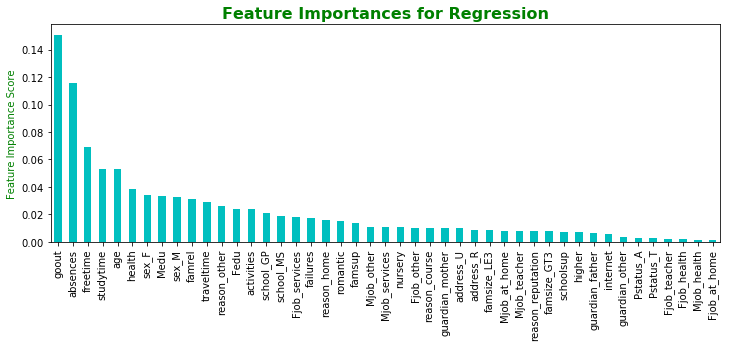

In [29]:
#####################################################
### Tuning Parameters for Random Forest Regressor ###
#####################################################
            #################################
                # Scoring on R Squared #
            #################################
            # Note: Using R-Squared will be fine to tune the model as the number of predictors is not changing 
            #       Thus adjusted R-Squared is not necessary
            
rf_reg = RandomForestRegressor(random_state=17, 
                                n_estimators=500,
                                max_features = 14,
                                max_depth = 13,
                                min_samples_split = 2,
                                min_samples_leaf = 2,
                                n_jobs = 1,
                                oob_score = True
                               )

########################
### Parameter Trials ###
########################

#param_test = {'n_estimators':range(10,551,10)} #500
#param_test = {'max_depth':range(2,15,1), 'min_samples_split':range(2,15,1)} #13 , 2
#param_test = {'max_features':range(2,21,1)} #14
#param_test = {'min_samples_leaf':range(2,15,1)} # 2
#param_test = {'n_jobs':range(1,5,1)} 

#rf_reg_gs = GridSearchCV(estimator = rf_reg, param_grid = param_test, scoring='r2',n_jobs=4,iid=False, cv=5)
#rf_reg_gs.fit(reg_X_train, reg_y_train)
#rf_reg_gs.grid_scores_, rf_reg_gs.best_params_, rf_reg_gs.best_score_
###############################
### Testing the Tuned Model ###
###############################
print('*************************************************** TUNED MODEL ***************************************************')
reg_modelfit(rf_reg, reg_X_train, reg_y_train, p_cols, reg_X_test, reg_y_test)

## Step 8 - Deciding on Which Technique to Use
In this step I will be comparing the results of my regression path to the results of my classification path using recall.

In [51]:
#########################################
### Testing Recall via Classification ###
#########################################
# Recall - Of everyone who should have been identified, how many were actually identified?

print 'Recall: %.4g' % metrics.recall_score(clf_y_test, gbm_clf.predict(clf_X_test))
print 'Precision: %.4g' % metrics.precision_score(clf_y_test, gbm_clf.predict(clf_X_test))
print 'F1 Score: %.4g' % metrics.f1_score(clf_y_test, gbm_clf.predict(clf_X_test))

Recall: 0.7091
Precision: 0.8478
F1 Score: 0.7723


In [52]:
#####################################
### Testing Recall via Regression ###
#####################################
# Recall - Of everyone who should have been identified, how many were actually identified?
#gbm_reg.predict(reg_X_test)

#np.percentile(alc_vars.alcohol, 75)

def reg_to_clf(predictions):
    '''This function converts the regression prediction to the binary variable at or above 3rd quartile'''
    reg_clf = []
    for pred in predictions:
        if pred >= np.percentile(alc_vars.alcohol, 75):
            pred = 1.
        else:
            pred = 0.
        reg_clf.append(pred)
    return reg_clf

print 'Recall: %.4g' % metrics.recall_score(clf_y_test, reg_to_clf(gbm_reg.predict(reg_X_test)))
print 'Precision: %.4g' % metrics.precision_score(clf_y_test, reg_to_clf(gbm_reg.predict(reg_X_test)))
print 'F1 Score: %.4g' % metrics.f1_score(clf_y_test, reg_to_clf(gbm_reg.predict(reg_X_test)))

Recall: 0.8727
Precision: 0.96
F1 Score: 0.9143
